## 2. Кейс «Прогнозирование конечных свойств новых материалов (композиционных материалов)»
Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. Кейс основан на реальных производственных задачах ООО «СК-СХД».
Актуальность: Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
Датасет со свойствами композитов. Объединение делать по индексу тип объединения INNER.

## Exploratory Data Analysis

#### Импортируем библиотеки необходимые для анализа и предобработки данных

In [1]:
import pandas as pd
import matplotlib.pyplot  as  plt 
import seaborn as sns
import numpy as np
from scipy import stats

#### Загрузим данные из предоставленных файлов

In [2]:
data_part_1 = pd.read_excel('X_bp.xlsx')
data_part_2 = pd.read_excel('X_nup.xlsx')

In [3]:
data_part_1.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [4]:
data_part_2.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.0,57.0
1,1.0,0.0,4.0,60.0
2,2.0,0.0,4.0,70.0
3,3.0,0.0,5.0,47.0
4,4.0,0.0,5.0,57.0


In [5]:
data_part_1.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,511.000000,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,295.458965,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,255.500000,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,511.000000,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,766.500000,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,1022.000000,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [6]:
data_part_2.describe()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1040.000000,1040.00000,1040.000000,1040.000000
mean,519.500000,45.00000,6.911385,57.248399
std,300.366443,45.02165,2.555181,12.332438
min,0.000000,0.00000,0.000000,0.000000
25%,259.750000,0.00000,5.102256,49.970740
50%,519.500000,45.00000,6.938000,57.413594
75%,779.250000,90.00000,8.587662,65.107235
max,1039.000000,90.00000,14.440522,103.988901


In [7]:
data_part_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(11)
me

In [8]:
data_part_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   float64
 1   Угол нашивки, град  1040 non-null   float64
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(4)
memory usage: 32.6 KB


Объединим данные по столбцу "Unnamed: 0" используя метод "inner"

In [9]:
data = data_part_1.merge(data_part_2, on = 'Unnamed: 0', how = 'inner')

In [10]:
data.drop(columns = ['Unnamed: 0'],axis = 1, inplace = True)
data.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [12]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


#### Построим графики для признака "Соотношение матрица-наполнитель"

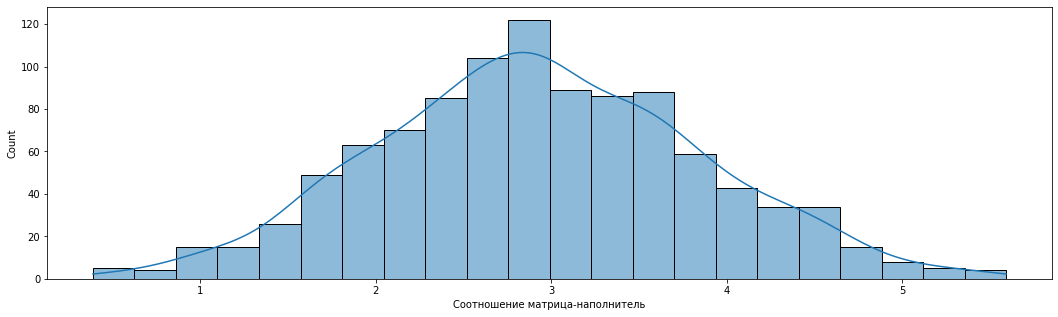

In [13]:
plt.figure(figsize=(18,5))
sns.histplot(data['Соотношение матрица-наполнитель'], kde=True)
plt.show()

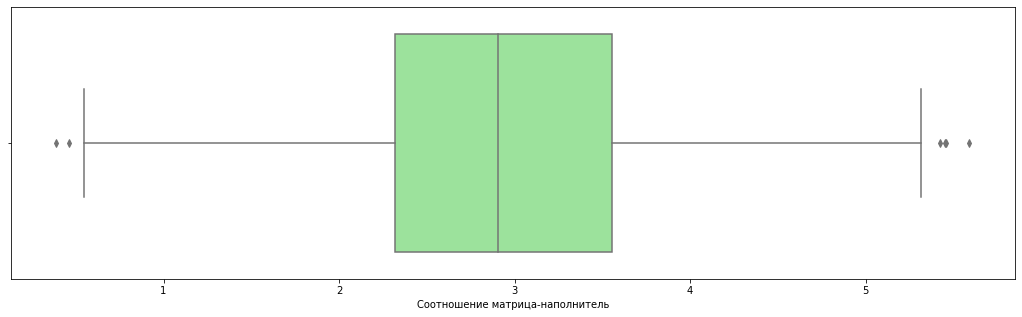

In [14]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Соотношение матрица-наполнитель'], color = 'lightgreen');

#### Построим графики для признака "Плотность, кг/м3"

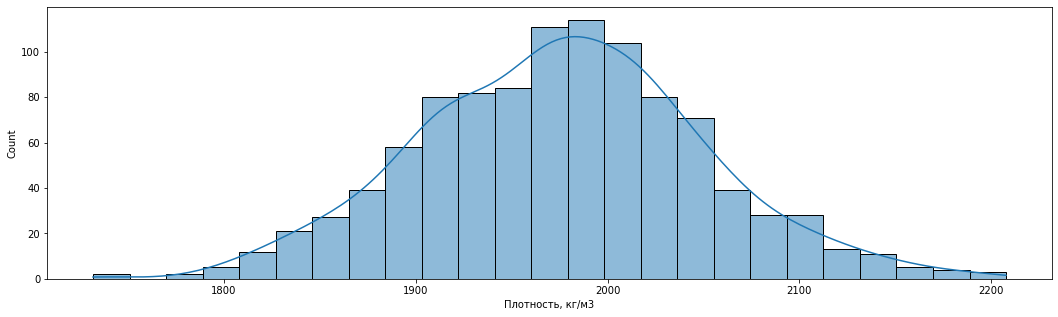

In [15]:
plt.figure(figsize=(18,5))
sns.histplot(data['Плотность, кг/м3'], kde=True)
plt.show()

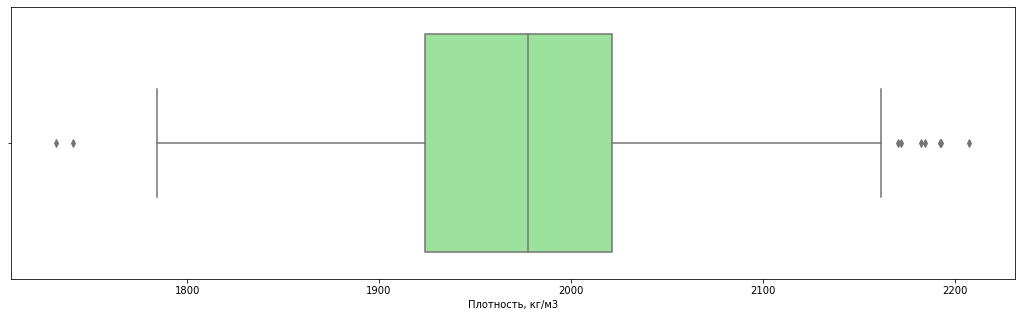

In [16]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Плотность, кг/м3'], color = 'lightgreen');

#### Построим графики для признака "Модуль упругости, ГПа"

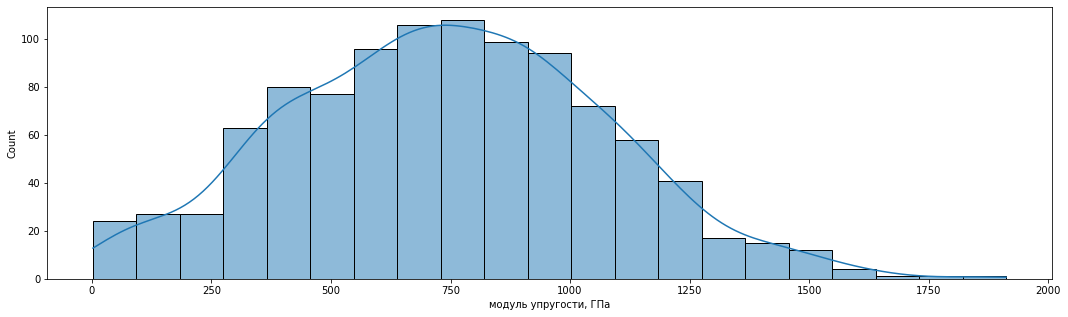

In [17]:
plt.figure(figsize=(18,5))
sns.histplot(data['модуль упругости, ГПа'], kde=True)
plt.show()

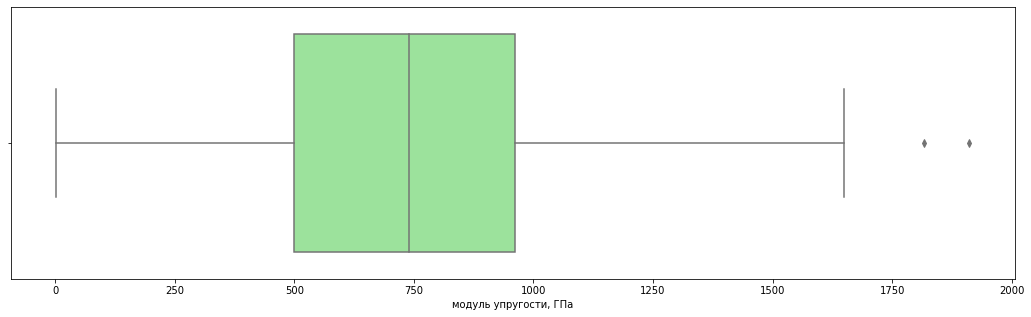

In [18]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['модуль упругости, ГПа'], color = 'lightgreen');

#### Построим графики для признака "Количество отвердителя, м.%"

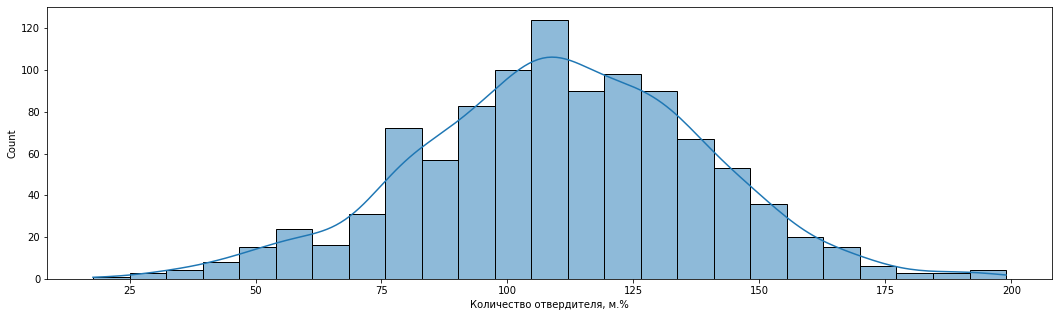

In [19]:
plt.figure(figsize=(18,5))
sns.histplot(data['Количество отвердителя, м.%'], kde=True)
plt.show()

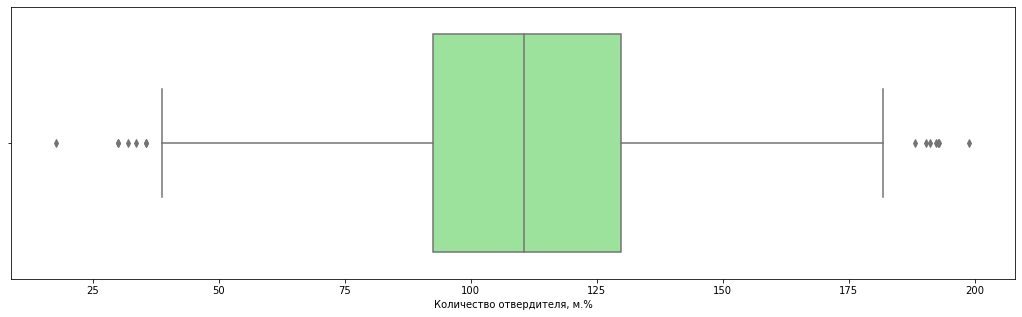

In [20]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Количество отвердителя, м.%'], color = 'lightgreen');

#### Построим графики для признака "Содержание эпоксидных групп,%_2"

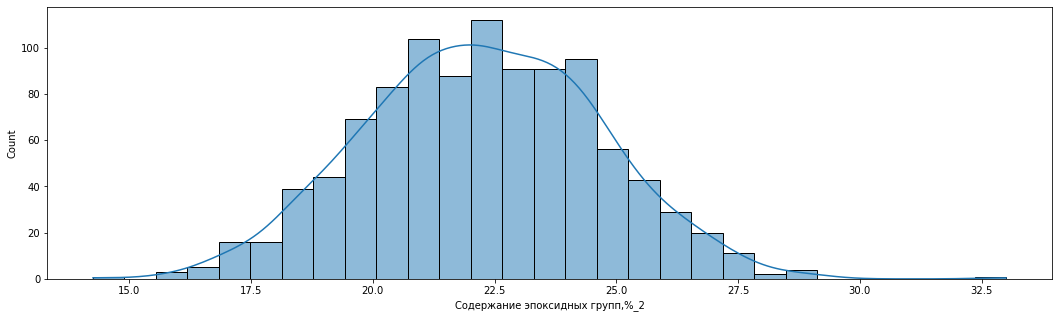

In [21]:
plt.figure(figsize=(18,5))
sns.histplot(data['Содержание эпоксидных групп,%_2'], kde=True)
plt.show()

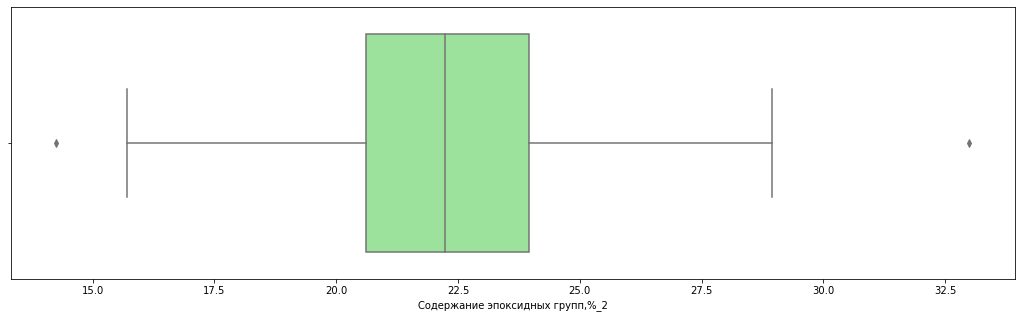

In [22]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Содержание эпоксидных групп,%_2'], color = 'lightgreen');

#### Построим графики для признака "Температура вспышки, С_2"

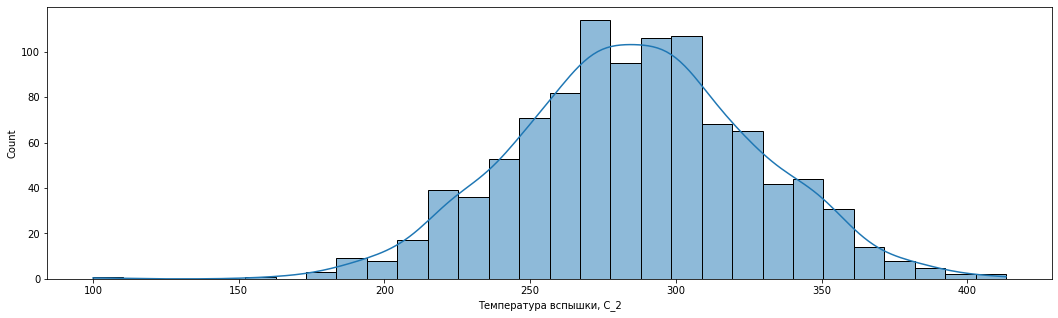

In [23]:
plt.figure(figsize=(18,5))
sns.histplot(data['Температура вспышки, С_2'], kde=True)
plt.show()

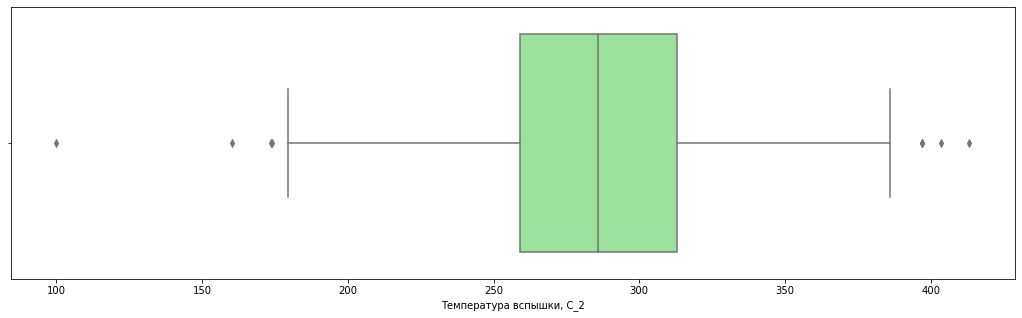

In [24]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Температура вспышки, С_2'], color = 'lightgreen');

#### Построим графики для признака "Поверхностная плотность, г/м2"

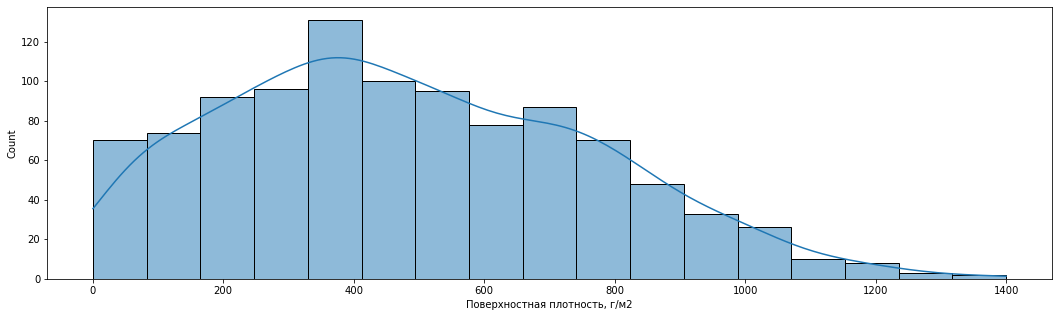

In [25]:
plt.figure(figsize=(18,5))
sns.histplot(data['Поверхностная плотность, г/м2'], kde=True)
plt.show()

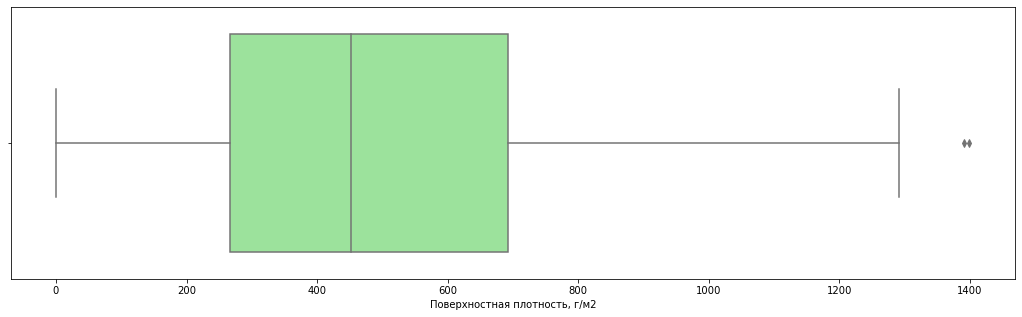

In [26]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Поверхностная плотность, г/м2'], color = 'lightgreen');

#### Построим графики для признака "Модуль упругости при растяжении, ГПа"

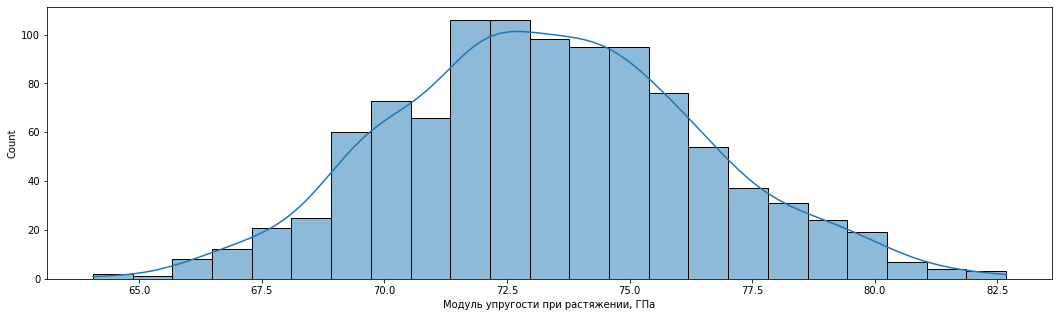

In [27]:
plt.figure(figsize=(18,5))
sns.histplot(data['Модуль упругости при растяжении, ГПа'], kde=True)
plt.show()

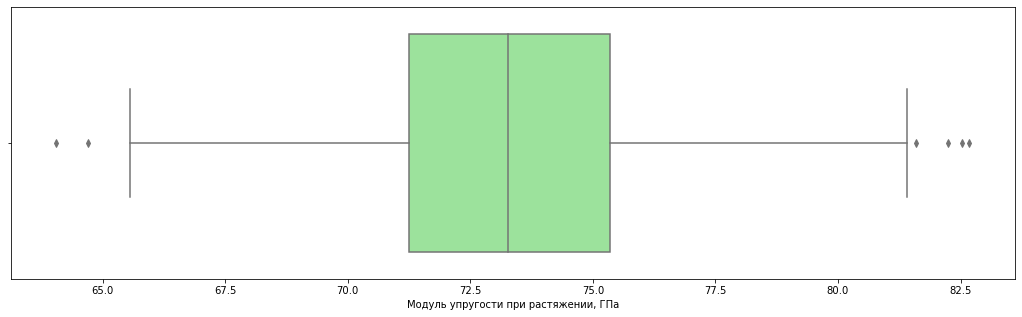

In [28]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Модуль упругости при растяжении, ГПа'], color = 'lightgreen');

#### Построим графики для признака "Прочность при растяжении, МПа"

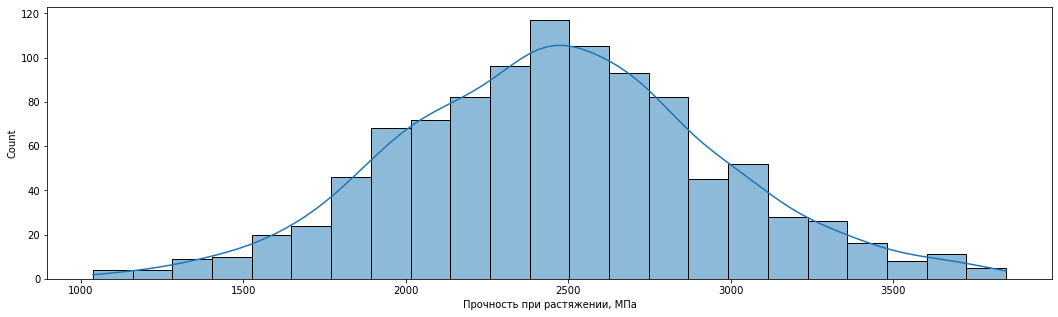

In [29]:
plt.figure(figsize=(18,5))
sns.histplot(data['Прочность при растяжении, МПа'], kde=True)
plt.show()

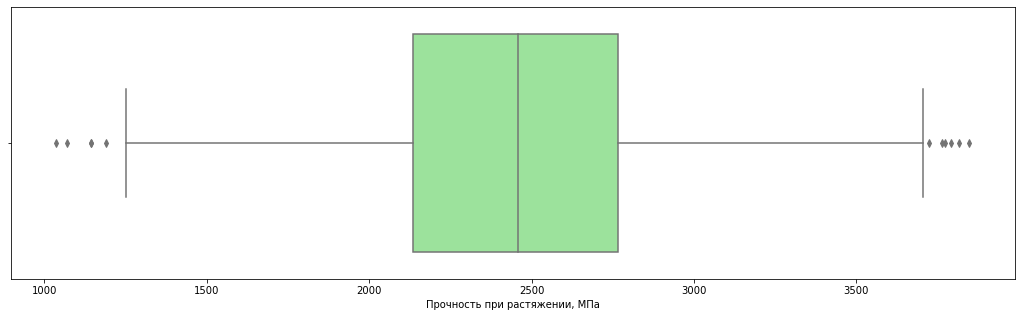

In [30]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Прочность при растяжении, МПа'], color = 'lightgreen');

#### Построим графики для признака "Потребление смолы, г/м2"

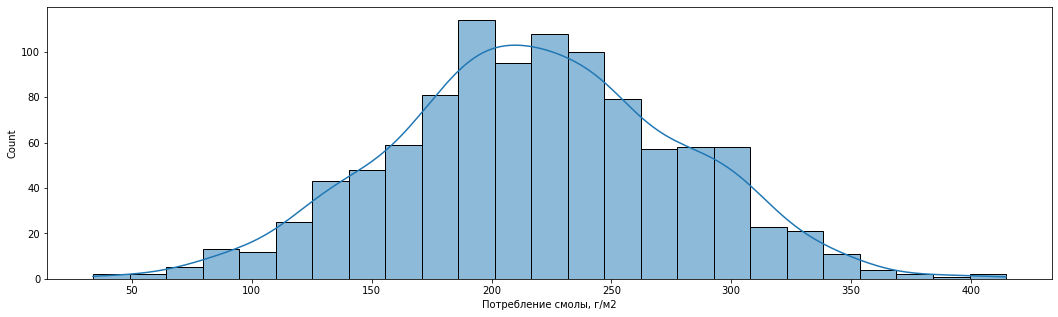

In [31]:
plt.figure(figsize=(18,5))
sns.histplot(data['Потребление смолы, г/м2'], kde=True)
plt.show()

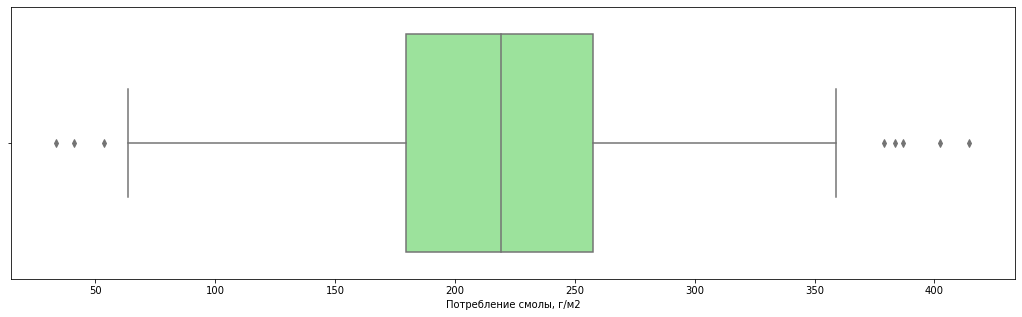

In [32]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Потребление смолы, г/м2'], color = 'lightgreen');

#### Исследуем признак "Угол нашивки, град"

In [33]:
data['Угол нашивки, град'].unique()

array([ 0., 90.])

Признак "Угол нашивки, град" может принимать два значения 0 или 90 градусов. При построении моделей можно применить Label Encoding.

#### Построим графики для признака "Шаг нашивки"

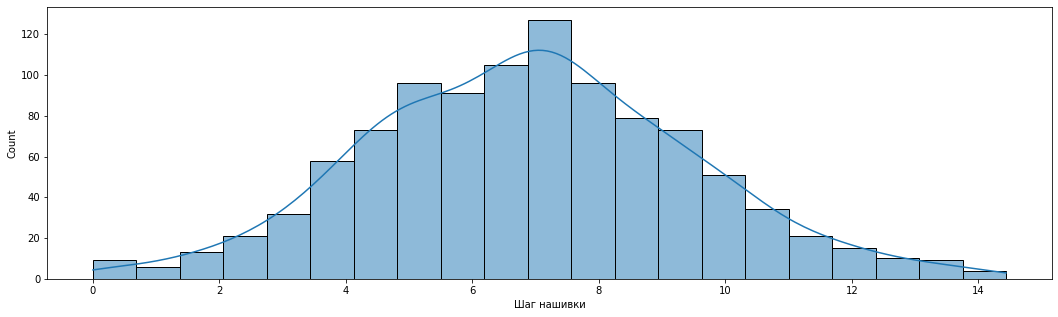

In [34]:
plt.figure(figsize=(18,5))
sns.histplot(data['Шаг нашивки'], kde=True)
plt.show()

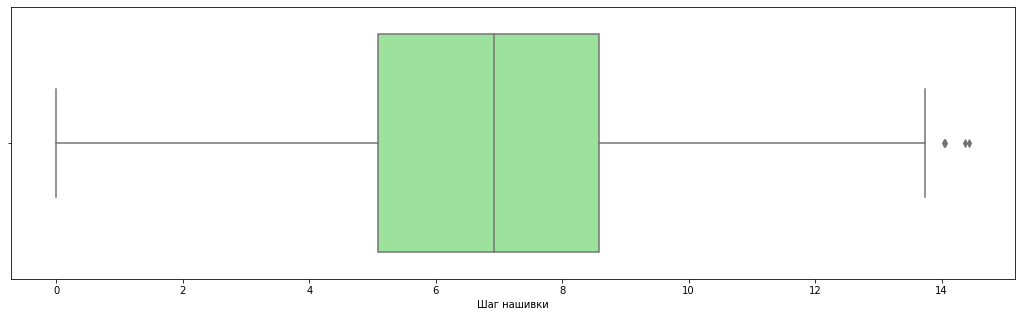

In [35]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Шаг нашивки'], color = 'lightgreen');

#### Построим графики для признака "Плотность нашивки"

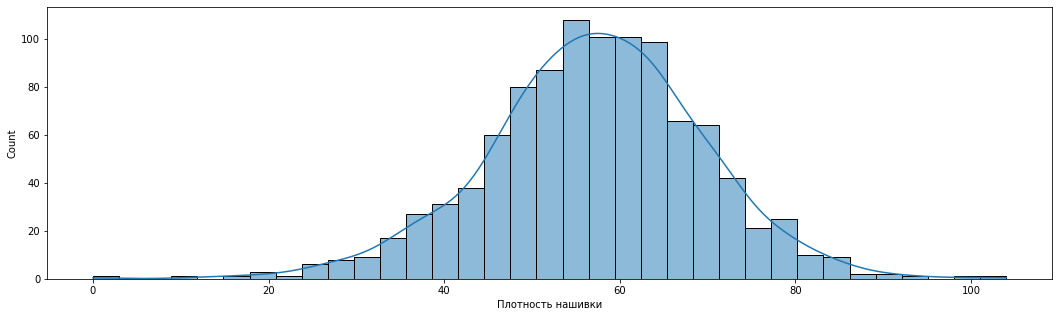

In [36]:
plt.figure(figsize=(18,5))
sns.histplot(data['Плотность нашивки'], kde=True)
plt.show()

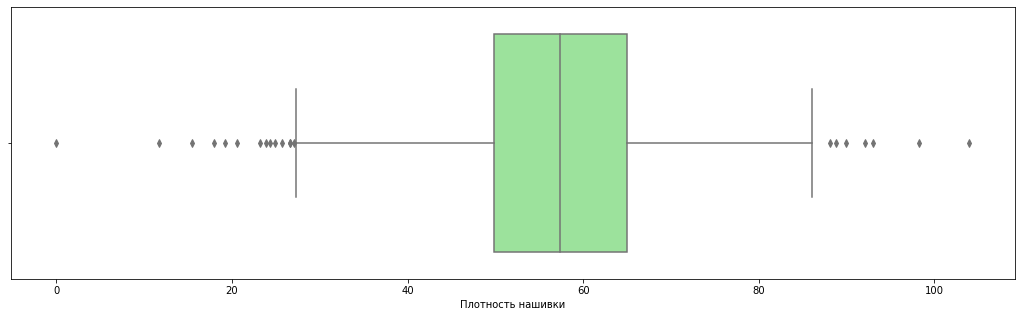

In [37]:
plt.figure(figsize=(18,5))
sns.boxplot(x = data['Плотность нашивки'], color = 'lightgreen');

 ### Удалим выбросы

Воспользуемся кодом из последнего семинара

In [38]:
sgm = 0
iqd= 0
for column in data:
    d = data.loc[:, [column]]
    # методом 3-х сигм
    zscore = (data[column] - data[column].mean()) / data[column].std()
    d['3s'] = zscore.abs() > 3
    sgm += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(data[column], 0.25)
    q3 = np.quantile(data[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (data[column] <= lower) | (data[column] >= upper)
    iqd+= d['iq'].sum()
print( sgm,'-- выброс методом 3-х сигм',)
print( iqd,'-- выброс методом межквартильных расстояний',)

24 -- выброс методом 3-х сигм
93 -- выброс методом межквартильных расстояний


Необходимо отметить что для корректного удаления выбросов надо понимать действительно ли они такими являются, или это на самом деле нормальное значение.

data = data[(np.abs(stats.zscore(data)) <= 3).all(axis=1)]

#### Исследуем корреляцию между признаками

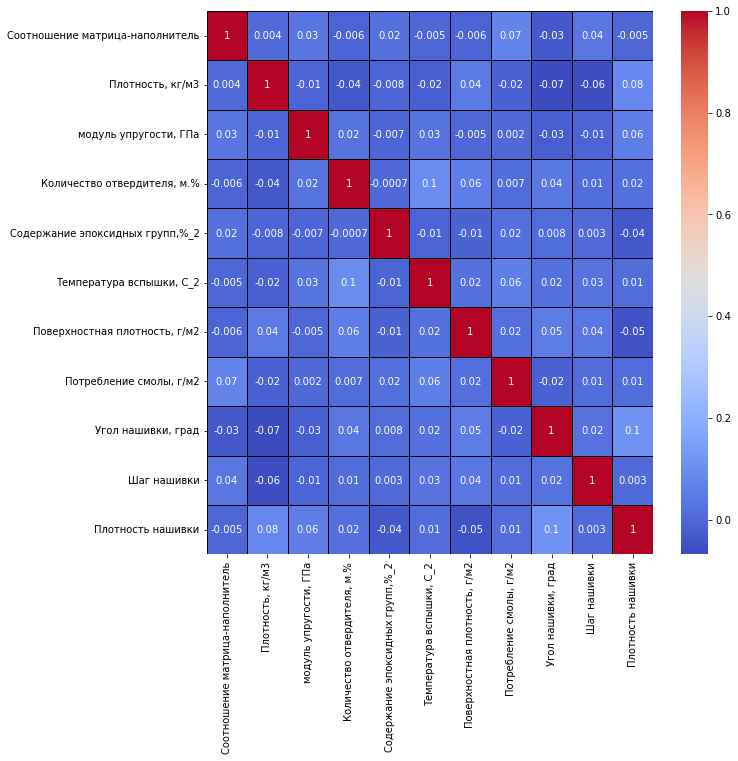

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis = 1).corr(), annot = True, fmt='.1g', cmap= 'coolwarm', cbar_kws= {'orientation': 'vertical'}, 
           linewidths=1, linecolor='black');

## Вывод по разделу Exploratory Data Analysis

В предоставленных данных отсутствуют пропуски. После объединения двух таблиц методом inner получили таблицу содержащую 1023 строки. \
В таблице 13 столбцов, 2 из которых ("Модуль упругости при растяжении, ГПа" и "Прочность при растяжении, МПа") это целевые значения. \
На основе имеющихся данных кейсе требуется построить модель машинного обучения предсказывающую данные значения. \
Также отмечу что в данных возможны выбросы. Их можно удалить или заменить значения на ближайшее значение границы размаха. При этом необходимо обладать экспертизой в области рассматриваемой задачи, т.к. это может быть нормальное значение. Оставим имеющиеся значения, построим модели для обучения и посмотрим на результат. \
Корреляции между признаками не наблюдается.


# Feature engineering

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Используем Label Encoder для преобразования столбца "Угол нашивки, град"

In [41]:
data[['Угол нашивки, град']] = data[['Угол нашивки, град']].apply(le.fit_transform)

Для удобства работы при дальнейшей разработке веб-сервиса переименуем названия признаков по первым буквам.

In [42]:
data = data.rename(columns={"Соотношение матрица-наполнитель": "smn", 
                     "Плотность, кг/м3": "pl",
                    "модуль упругости, ГПа": "mu",
                    "Количество отвердителя, м.%": "ko",
                    "Содержание эпоксидных групп,%_2":"seg",
                    "Температура вспышки, С_2": "tv",
                    "Поверхностная плотность, г/м2": "pp",
                    "Модуль упругости при растяжении, ГПа":"mupr_target",
                    "Прочность при растяжении, МПа" : "ppr_target",
                    "Потребление смолы, г/м2" : "ps",
                    "Угол нашивки, град": "un",
                    "Шаг нашивки": "shn",
                    "Плотность нашивки": "pn"
                    })

## Вывод по разделу Feature engineering

Данные приведены в более корректный формат для построения моделей машинного обучения. \
StandardScaler() будет использован в следующем разделе непосредственно в пайплайне.

# Построение моделей

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

При построении моделей машинного обучения нам необходимо предсказать сразу два целевых значения "Модуль упругости при растяжении, ГПа" и "Прочность при растяжении, МПа".
Имеются следующие варианты построения моделей.
1. Построить две независимые модели для каждого целевого значения. 
В дальнейшем при реализации веб-сервиса для каждого целевого значения придется реализовать выбор какой из признаков мы хотим предсказать. \
В кейсе, скорее, говорится о необходимости построить одну модель для обоих параметров.
2. Построить модель предсказывающую один из целевых признаков, затем подставлять его как признак во вторую модель.
В данном случае, не лишним будет обладать экспертизой в предметной области чтобы оценить качество предсказаний первой модели. Если качество предсказаний низкое, то это, вероятно, может ухудшить результаты предсказаний второй модели.
3. Использовать инструменты позволяющие в одной модели предсказывать сразу два целевых параметра.

Предпочтительным способом выглядит третий, но т.к. ранее не сталкивался с задачей мульти-регрессии также построим две модели предсказывающие целевые значения по отдельности для проверки корректности работы модели.

In [44]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import shap
pd.set_option('max_colwidth', 1000)

In [45]:
cv = 5
rnd_st = 12345

Разобьем массив на признаки и целевые значения.

In [46]:
#!g1.1
features = data.drop(['mupr_target', 'ppr_target'], axis = 1)
target = data[['mupr_target', 'ppr_target']]

In [47]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = 0.2, random_state = rnd_st)

In [48]:
#!g1.1
model_params = {
    'LinearRegression' : {
        'model': LinearRegression(),
        'params': {
        }
    },
        'LogisticRegression' : {
        'model': LinearRegression(),
        'params': {
        }
    },
    'RandomForestRegressor' : {
        'model': RandomForestRegressor(),
        'params': {
            'RegChain__base_estimator__n_estimators': range (1, 301, 100),
            'RegChain__base_estimator__max_depth': range (1, 21, 4)
            },
    },
    'DecisionTreeRegressor' : {
        'model': DecisionTreeRegressor(),
        'params': {
            'RegChain__base_estimator__max_depth': range (1, 21, 4)
        }
    },

    'XGBoost': {
        'model': xgb.XGBRegressor(),
        'params': {
            'RegChain__base_estimator__n_estimators': range (1, 51, 10),
            'RegChain__base_estimator__max_depth': range (1, 11, 2)
        }
    },
    'LGBMRegressor': {
        'model': LGBMRegressor(),
        'params': {
            'RegChain__base_estimator__n_estimators': range (1, 51, 10),
            'RegChain__base_estimator__max_depth': range (1, 4),
        }
    },
    'CatBoostRegressor':{
        'model': CatBoostRegressor(),
        'params': {
            'RegChain__base_estimator__depth': [1, 5],
        }
    },  
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    pipeline = Pipeline([('scaler', StandardScaler()),('RegChain', RegressorChain(base_estimator = mp['model']))])
    start_learning = time.monotonic()
    grid = GridSearchCV(pipeline, scoring='neg_mean_absolute_error', 
                              cv = cv, verbose = 3, n_jobs = -1, param_grid = mp['params'])
    grid.fit(features_train, target_train)
    end_learning = time.monotonic()
    learning_time = end_learning - start_learning
    
    scores.append({
        'model': model_name,
        'best_score': (-1)*grid.best_score_,
        'best_params': grid.best_params_,
        'learning_time': learning_time,
        'time_learning_1': grid.refit_time_,
    })

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
model_score = pd.DataFrame(scores,columns=['model','best_score','best_params', 'learning_time', 
                                           'time_learning_1'])
model_score

Наилучший результат показали модели "RandomForestRegressor" и "LGBMRegressor". Также хороший результат может показать модель 'CatBoostRegressor' при определенных гиперпараметрах, но очень долго обучается, и имеет нюансы при работе с GridSearchCV. \
Остановится на модели "LGBMRegressor" - она показала лучший результат и малое время обучения.
Обучим модель с учетом найденных гиперпараметров.

In [ ]:
pipeline_2 = Pipeline([('scaler', StandardScaler()), ('RegChain', RegressorChain(base_estimator = LGBMRegressor(random_state = rnd_st, 
                                                                                  max_depth = 3,
                                                                                 n_estimators = 1)))])   
pipeline_2.fit(features_train, target_train)
predicted = pipeline_2.predict(features_test)

In [ ]:
MAE = mean_absolute_error(target_test.iloc[:, 0], predicted[:,0])
R2 = r2_score(target_test.iloc[:, 0], predicted[:,0])
print("Средняя абсолютная ошибка, MAE:", '{:.3f}'.format(MAE))
print("Средняя абсолютная ошибка, R2:", '{:.3f}'.format(R2))

In [ ]:
MAE = mean_absolute_error(target_test.iloc[:, 1], predicted[:,1])
R2 = r2_score(target_test.iloc[:, 1], predicted[:,1])
print("Средняя абсолютная ошибка, MAE:", '{:.3f}'.format(MAE))
print("Средняя абсолютная ошибка, R2:", '{:.3f}'.format(R2))

### Создадим две отдельные модели для предсказания значений "Модуль упругости при растяжении, ГПа" и "Прочность при растяжении, МПа

In [ ]:
features = data.drop(['mupr_target', 'ppr_target'], axis = 1)
target_mupr = data['mupr_target']
target_ppr = data['ppr_target']

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target_mupr, 
                                                                            test_size = 0.2, random_state = rnd_st)

In [ ]:
model_params = {
    'LGBMRegressor': {
        'model': LGBMRegressor(),
        'params': {
            'n_estimators': range (1, 51, 10),
            'max_depth': range (1, 4),
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    start_learning = time.monotonic()
    grid = GridSearchCV(mp['model'], mp['params'], scoring='neg_mean_absolute_error', cv = cv, verbose = 0, n_jobs = -1)
    grid.fit(features_train, target_train)
    end_learning = time.monotonic()
    learning_time = end_learning - start_learning
    
    scores.append({
        'model': model_name,
        'best_score': (-1)*grid.best_score_,
        'best_params': grid.best_params_,
        'learning_time': learning_time,
        'time_learning_1': grid.refit_time_,
    })

In [ ]:
model_score = pd.DataFrame(scores,columns=['model','best_score','best_params', 'learning_time', 
                                           'time_learning_1'])
model_score

In [ ]:
model = LGBMRegressor(n_estimators = 21, max_depth = 3, loss_function ='MAE', random_state = rnd_st, verbose = 0) 
model.fit(features_train, target_train)
predicted = model.predict(features_test)
MAE = mean_absolute_error(target_test, predicted)
R2 = r2_score(target_test, predicted)
print("Средняя абсолютная ошибка, MAE:", '{:.3f}'.format(MAE))
print("Средняя абсолютная ошибка, R2:", '{:.3f}'.format(R2))

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(np.array(target_test), color='green', label='TEST')
plt.plot(predicted, color='red', label='PREDICT')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target_ppr, 
                                                                            test_size = 0.2, random_state = rnd_st)

In [ ]:
model_params = {
    'LGBMRegressor': {
        'model': LGBMRegressor(),
        'params': {
            'n_estimators': range (1, 51, 10),
            'max_depth': range (1, 4),
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    start_learning = time.monotonic()
    grid = GridSearchCV(mp['model'], mp['params'], scoring='neg_mean_absolute_error', cv = cv, verbose = 0, n_jobs = -1)
    grid.fit(features_train, target_train)
    end_learning = time.monotonic()
    learning_time = end_learning - start_learning
    
    scores.append({
        'model': model_name,
        'best_score': (-1)*grid.best_score_,
        'best_params': grid.best_params_,
        'learning_time': learning_time,
        'time_learning_1': grid.refit_time_,
    })

In [ ]:
model_score = pd.DataFrame(scores,columns=['model','best_score','best_params', 'learning_time', 
                                           'time_learning_1'])
model_score

In [ ]:
model = LGBMRegressor(n_estimators = 21, max_depth = 3, loss_function ='MAE', random_state = rnd_st, verbose = 0) 
model.fit(features_train, target_train)
predicted = model.predict(features_test)
MAE = mean_absolute_error(target_test, predicted)
R2 = r2_score(target_test, predicted)
print("Средняя абсолютная ошибка, MAE:", '{:.3f}'.format(MAE))
print("Средняя абсолютная ошибка, R2:", '{:.3f}'.format(R2))

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(np.array(target_test), color='green', label='TEST')
plt.plot(predicted, color='red', label='PREDICT')
plt.grid(True)
plt.legend()
plt.show()

## Вывод по построению моделей

Модель с двумя выходами показывает результат схожий с двумя отдельными моделями. Полученные метрики отличаются незначительно. При этом качество самих моделей достаточно низкое. Полученный результат затруднительно использовать в реальном моделировании материалов.

## Нейронная сеть

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

### Построим нейронную сеть с двумя нейронами в выходном слое

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = 0.2, random_state = rnd_st)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = features_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam',  loss='mse', metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model_hist = model.fit(features_train, target_train, epochs=50, verbose=1, validation_split = 0.2, shuffle=True)

In [ ]:
mse, mae = model.evaluate(features_test, target_test, verbose=0)

In [ ]:
print("Средняя абсолютная ошибка:", mae)

In [ ]:
pred = model.predict(features_test)

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(np.array(target_test.iloc[:,0]), color='green', label='TEST')
plt.plot(pred[:, 0], color='red', label='PREDICT')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(np.array(target_test.iloc[:,1]), color='green', label='TEST')
plt.plot(pred[:, 1], color='red', label='PREDICT')
plt.grid(True)
plt.legend()
plt.show()

Сохраним модель для дальнейшего использования в веб-сервисе.

In [ ]:
model.save('model');

### Построим одельные нейронные сети для каждого целевого значения с одним нейронами в выходном слое

In [ ]:
features = data.drop(['mupr_target', 'ppr_target'], axis = 1)
target_mupr = data['mupr_target']
target_ppr = data['ppr_target']

In [ ]:
scaler = StandardScaler()
features_norm = scaler.fit_transform(features)

In [ ]:
features_train, features_test, target_mupr_train, target_mupr_test = train_test_split(features, target_mupr, 
                                                                            test_size = 0.2, random_state = rnd_st)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = features_train.shape[1]))
model.add(Dense(128, activation='relu')) #add
model.add(Dense(64, activation='relu')) 
model.add(Dense(1))
model.compile(optimizer='adam',  loss='mse', metrics=['mae'])
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model_hist = model.fit(features_train, target_mupr_train, epochs=50, verbose=1, validation_split = 0.2, shuffle=True)

In [ ]:
def model_loss_plot(model_hist):
    plt.figure(figsize=(17,5))
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title('График потерь')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'val_loss'])
    plt.show()
model_loss_plot(model_hist)

In [ ]:
mse, mae = model.evaluate(features_test, target_mupr_test, verbose=0)

In [ ]:
print("Средняя абсолютная ошибка:", mae)

In [ ]:
pred_mupr = model.predict(features_test)

In [ ]:
MAE = mean_absolute_error(target_mupr_test, pred_mupr)
R2 = r2_score(target_mupr_test, pred_mupr)
print("Средняя абсолютная ошибка, MAE:", '{:.3f}'.format(MAE))
print("Средняя абсолютная ошибка, R2:", '{:.3f}'.format(R2))

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(np.array(target_mupr_test), color='green', label='TEST_PPR')
plt.plot(pred_mupr, color='red', label='PREDICT_PPR')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
features_train, features_test, target_ppr_train, target_ppr_test = train_test_split(features, target_ppr, 
                                                                            test_size = 0.2, random_state = rnd_st)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = features_train.shape[1]))
model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(1))
model.compile(optimizer='adam',  loss='mse', metrics=['mae'])
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model_hist = model.fit(features_train, target_ppr_train, epochs=50, verbose=1, validation_split = 0.2, shuffle=True)

In [ ]:
def model_loss_plot(model_hist):
    plt.figure(figsize=(17,5))
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title('График потерь')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'val_loss'])
    plt.show()
model_loss_plot(model_hist)

In [ ]:
mse, mae = model.evaluate(features_test, target_ppr_test, verbose=0)

In [ ]:
print("Средняя абсолютная ошибка:", mae)

In [ ]:
pred_ppr = model.predict(features_test)

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(np.array(target_ppr_test), color='green', label='TEST')
plt.plot(pred_ppr, color='red', label='PREDICT')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
MAE = mean_absolute_error(target_ppr_test, pred_ppr)
R2 = r2_score(target_ppr_test, pred_ppr)
print("Средняя абсолютная ошибка, MAE:", '{:.3f}'.format(MAE))
print("Средняя абсолютная ошибка, R2:", '{:.3f}'.format(R2))

## Вывод по построению нейронных сетей

Нейронная сеть с двумя нейронами в выходном слое показывает результат схожий с двумя отдельными моделями. Это говорит о том что модель работает корректно и её можно использовать в веб-сервисе. Другой вопрос что качество всех трех моделей находится на достаточно невысоком уровне. Для повышения качества модели необходимо по-другому подойти к вопросу предобработки данных и быть экспертом в данной области, даже, вероятно иначе выполнить сбор данных.

## Вывод по кейсу

В результате выполнения работы были выполнены: \
    - анализ данных; \
    - объединены данные из разных таблиц; \
    - предобработка данных; \
    - поиск лучшей модели и оптимальных гиперпараметров; \
    - использованы инструменты позволяющие предсказывать несколько значений в одной модели; \
    - обучена модель; \
    - получены предсказания модели; \
    - построена нейронная сеть; \
    - сохранена модель для дальнейшего использования в веб-сервисе; \
    - создан веб-сервис с пользовательским интерфейсом. \
Для улучшения качества модели необходимо проработать входные данные совместно с "бизнесом".